In [1]:
%autosave 0

Autosave disabled


In [2]:
from pydataset import data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
df = data('iris')

In [4]:
df.columns = [col.lower().replace('.', '_') for col in df.columns]

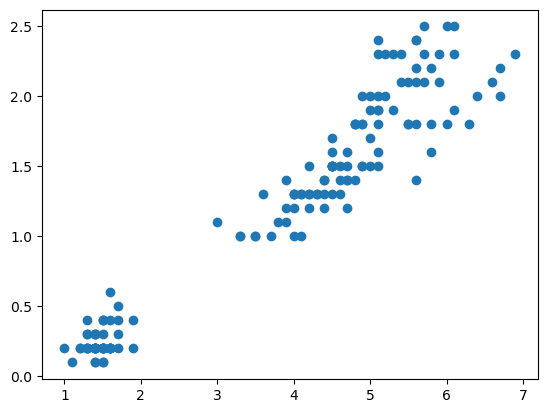

In [43]:
plt.scatter(df.petal_length,df.petal_width)

In [6]:
features = ['sepal_length','sepal_width','petal_length','petal_width']



In [7]:
df = df.dropna(subset=features)
data = df[features].copy()

In [8]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


# Scaling using Min Max

In [9]:
data = ((data -data.min())/(data.max()-data.min()))*9+1

In [10]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width
1,3.00,6.625,1.610169,1.375
2,2.50,4.750,1.610169,1.375
3,2.00,5.500,1.457627,1.375
4,1.75,5.125,1.762712,1.375
5,2.75,7.000,1.610169,1.375


# Create Centroids

In [11]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis =1)

In [12]:
centroids = random_centroids(data, 5)

In [13]:
centroids

,0,1,2,3,4
sepal_length,9.500000,3.000000,6.750000,7.000000,5.250000
sepal_width,4.375000,5.500000,2.125000,2.875000,5.875000
petal_length,5.423729,4.813559,8.169492,6.491525,6.338983
petal_width,5.500000,1.000000,8.125000,5.875000,10.000000


# Label Centroids center point

In [14]:
distances = centroids.apply(lambda x:np.sqrt(((data -x)**2).sum(axis=1)))

distances.head()

,0,1,2,3,4
1,8.880955,3.415839,11.086014,8.610467,10.118167
2,8.983289,3.348855,10.655531,8.236702,10.275234
3,9.500590,3.521776,11.160858,8.802315,10.436541
4,9.541681,3.339374,10.982228,8.673908,10.399297
5,9.165805,3.565786,11.329291,8.896952,10.211167


In [15]:
distances.idxmin(axis=1).head()

1    1
2    1
3    1
4    1
5    1
dtype: int64

In [16]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data -x)**2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [17]:
labels = get_labels(data, centroids)
labels.value_counts()

1    53
3    53
4    22
2    20
0     2
dtype: int64

In [18]:
data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T


,0,1,2,3,4
sepal_length,8.803408,2.620783,6.975967,5.124032,6.336780
sepal_width,6.528782,5.870617,4.007025,3.655480,5.432988
petal_length,7.834103,1.776883,8.242957,6.206998,7.682915
petal_width,6.909007,1.600030,8.082823,5.756870,8.735198


In [19]:
def new_centroids(data, label, k):
    return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

In [20]:
from sklearn.decomposition import PCA #visualize 5 dimension data into 2 column
import matplotlib.pyplot as plt
from IPython.display import clear_output #clear jupyter output and put new graph in

In [46]:
#using principal component analysis, i was able to populate a 2d
def plot_clusters(data, labels, centroids, iteration):  #iteration is just a counter
    pca = PCA(n_components=2)
    data_2d= pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration{iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

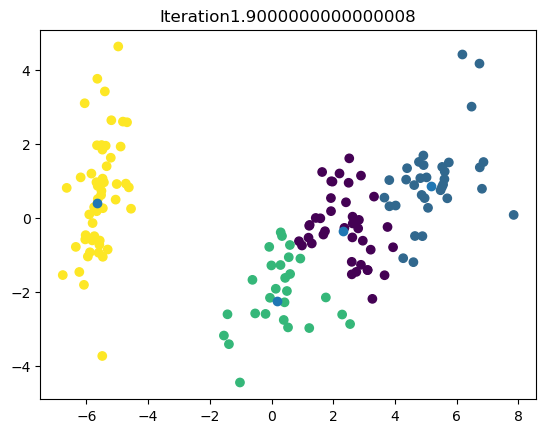

In [47]:
max_iterations=2
k=4
centroids=random_centroids(data,k)
old_centroids=pd.DataFrame()
iteration=1
while iteration < max_iterations:
    old_centroids = centroids
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, k)
    plot_clusters(data, labels, centroids, iteration)
    iteration += .1

In [48]:
df.max()

sepal_length          7.9
sepal_width           4.4
petal_length          6.9
petal_width           2.5
species         virginica
dtype: object

In [49]:
data.max()

sepal_length    10.0
sepal_width     10.0
petal_length    10.0
petal_width     10.0
dtype: float64

In [50]:
from sklearn.cluster import KMeans
centroids

,0,1,2,3
sepal_length,5.695093,7.323335,4.070916,2.613660
sepal_width,4.311352,5.003433,2.867333,6.181958
petal_length,6.733575,8.277822,5.513630,1.683939
petal_width,6.526619,8.609323,5.152652,1.503844


In [51]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [52]:
df[labels == 50][["species"] + features]
df

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa
10,4.9,3.1,1.5,0.1,setosa
